## Validation set and Training Set accuracy and loss is nearly same

In [1]:
import os, shutil

In [2]:
base_dir = '/home/skhatter/dataset13'
train_dir = '/home/skhatter/dataset13/train'
valid_dir = '/home/skhatter/dataset13/valid'

train_dam_dir = '/home/skhatter/dataset13/train/damaged'
train_undam_dir = '/home/skhatter/dataset13/train/undamaged'

valid_dam_dir = '/home/skhatter/dataset13/valid/damaged'
valid_undam_dir = '/home/skhatter/dataset13/valid/undamaged'

In [3]:
print('Total training damaged images', len(os.listdir(train_dam_dir)))
print('Total training undamaged images', len(os.listdir(train_undam_dir)))

print('Total validation damaged images', len(os.listdir(valid_dam_dir)))
print('Total validation undamaged images', len(os.listdir(valid_undam_dir)))

Total training damaged images 160
Total training undamaged images 234
Total validation damaged images 53
Total validation undamaged images 80


In [4]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [13]:
model = models.Sequential()
model.add(layers.ZeroPadding2D((1,1),input_shape=(3,224,224)))
model.add(layers.Convolution2D(64, 3, 3, activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(64, 3, 3, activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(128, 3, 3, activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(128, 3, 3, activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(256, 3, 3, activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(256, 3, 3, activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(256, 3, 3, activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(512, 3, 3, activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(512, 3, 3, activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(512, 3, 3, activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(512, 3, 3, activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(512, 3, 3, activation='relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1000, activation='softmax'))

model.summary()

/home/ishivvers/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ishivvers/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/home/ishivvers/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
/home/ishivvers/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


ValueError: Negative dimension size caused by subtracting 2 from 1 for 'max_pooling2d_7/MaxPool' (op: 'MaxPool') with input shapes: [?,1,112,128].

In [6]:
from keras import optimizers

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40,width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(512, 512), batch_size =5,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(valid_dir, target_size = (512, 512),
                                                        batch_size = 5, class_mode='binary')


#displaying the shapes of batch of data and labels
for data_batch, labels_batch in train_generator:
    print('train data batch: ', data_batch.shape)
    print('train label batch: ', labels_batch.shape)
    break
    
for data_batch, labels_batch in validation_generator:
    print('validation data batch: ', data_batch.shape)
    print('validation label batch', labels_batch.shape)
    break

Found 393 images belonging to 2 classes.
Found 132 images belonging to 2 classes.
train data batch:  (5, 512, 512, 3)
train label batch:  (5,)
validation data batch:  (5, 512, 512, 3)
validation label batch (5,)


In [9]:
#Fitting the model using a batch generator

history = model.fit_generator(train_generator, steps_per_epoch=50, epochs = 30, 
                              validation_data= validation_generator, validation_steps=25)


history_dict = history.history
print(history_dict.keys())

model.save('convnet1.h5')

Epoch 1/30
50/50 [==============================] - 45s - loss: 0.7681 - acc: 0.6040 - val_loss: 0.6811 - val_acc: 0.6000
Epoch 2/30
50/50 [==============================] - 46s - loss: 0.6890 - acc: 0.6133 - val_loss: 0.6873 - val_acc: 0.6066
Epoch 3/30
50/50 [==============================] - 43s - loss: 0.7165 - acc: 0.5840 - val_loss: 0.6807 - val_acc: 0.6311
Epoch 4/30
50/50 [==============================] - 43s - loss: 0.7061 - acc: 0.6013 - val_loss: 0.6808 - val_acc: 0.5902
Epoch 5/30
50/50 [==============================] - 43s - loss: 0.6868 - acc: 0.5759 - val_loss: 0.6766 - val_acc: 0.5984
Epoch 6/30
50/50 [==============================] - 44s - loss: 0.6845 - acc: 0.6200 - val_loss: 0.6803 - val_acc: 0.5902
Epoch 7/30
50/50 [==============================] - 44s - loss: 0.6902 - acc: 0.5613 - val_loss: 0.6780 - val_acc: 0.6066
Epoch 8/30
50/50 [==============================] - 43s - loss: 0.6870 - acc: 0.6039 - val_loss: 0.6752 - val_acc: 0.6066
Epoch 9/30
50/50 [======

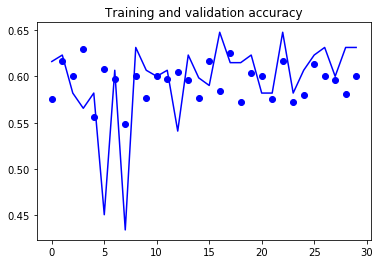

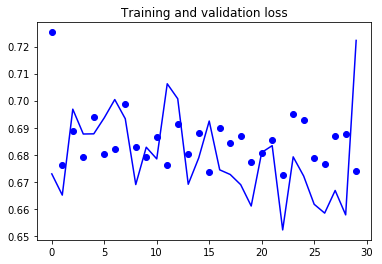

In [10]:
#Displaying curves of loss and accuracy during training 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')#dots
plt.plot(epochs, val_acc, 'b')#line segments
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()

In [11]:
#Fitting the model using a batch generator

history = model.fit_generator(train_generator, steps_per_epoch=50, epochs = 30, 
                              validation_data= validation_generator, validation_steps=25)


history_dict = history.history
print(history_dict.keys())

model.save('damage_undamaged_conv2_2.h5')

Epoch 1/30
50/50 [==============================] - 13s - loss: 0.7301 - acc: 0.6000 - val_loss: 0.6731 - val_acc: 0.6148
Epoch 2/30
50/50 [==============================] - 13s - loss: 0.6748 - acc: 0.6053 - val_loss: 0.6672 - val_acc: 0.6148
Epoch 3/30
50/50 [==============================] - 12s - loss: 0.6855 - acc: 0.5693 - val_loss: 0.6540 - val_acc: 0.6066
Epoch 4/30
50/50 [==============================] - 13s - loss: 0.6737 - acc: 0.6040 - val_loss: 0.6741 - val_acc: 0.5984
Epoch 5/30
50/50 [==============================] - 12s - loss: 0.6821 - acc: 0.5707 - val_loss: 0.6826 - val_acc: 0.5902
Epoch 6/30
50/50 [==============================] - 13s - loss: 0.6685 - acc: 0.6080 - val_loss: 0.6561 - val_acc: 0.5820
Epoch 7/30
50/50 [==============================] - 12s - loss: 0.6985 - acc: 0.5707 - val_loss: 0.6590 - val_acc: 0.6557
Epoch 8/30
50/50 [==============================] - 13s - loss: 0.6718 - acc: 0.6387 - val_loss: 0.6598 - val_acc: 0.5920
Epoch 9/30
50/50 [======

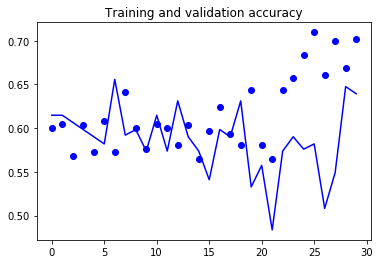

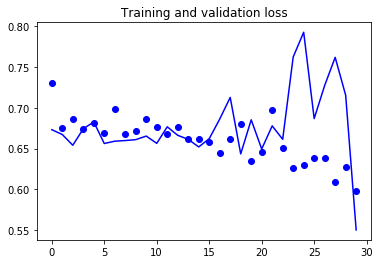

In [12]:
#Displaying curves of loss and accuracy during training 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')#dots
plt.plot(epochs, val_acc, 'b')#line segments
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()